# Telecom Customer Churn

## Business Understanding

Syriatel, a mobile network provider, is a high margin enterprise interested in reducing customer loss.  They have the ability to offer a special pricing promotion or adjust pricing plans but wish only to do so for customers they are about to lose in order to retain their business and maximize revenue.  I am tasked with building a classification model to predict which customers have the highest likihood of leaving so they can offer the promotion or pricing plan adjustment to reduce customer churn and maximize profits.

## Data Understanding

The data is a csv file from the telecom's customers.  There are over 3,300 rows of data and 21 columns such as minutes used, customer service calls placed, plans, charges, and of course churn.  I am evaluating all of the columns to see what is impacting churn so it can be predicted.  Limitations of this data are that it comes from only one company, Syriatel, and competitors data isn't used to shape our conclusions. 

## Data Preparation

There are 21 columns but not all of them are actually relevant to churn.  We are going to examine each column and measure its churn rates.  If the data is continuous it will be binned so that trends can be detected as the column's values get higher or lower.  Columns that are not relevant will be dropped from the classification model analysis.  I will build three models and seek to optimize F1 score (the harmonic mean of precision and recall), accuracy, precision, and recall.

### Importing modules

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance

from math import log
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

#### Model Definitions

In [3]:
#definition
def model_predictions(model, x_train, x_test, y_train, y_test):
    '''Enter model name and test/train sets to generate predictions, precision, recall, accuracy, and F1 score'''
    model.fit(x_train, y_train)
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    print('Training Precision: ', precision_score(y_train, y_hat_train))
    print('Testing Precision: ', precision_score(y_test, y_hat_test))
    print('-----')

    print('Training Recall: ', recall_score(y_train, y_hat_train))
    print('Testing Recall: ', recall_score(y_test, y_hat_test))
    print('-----')

    print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
    print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
    print('-----')

    print('Training F1-Score: ', f1_score(y_train, y_hat_train))
    print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

In [4]:
def plot_roc(model, x_train, x_test, y_train, y_test):
    '''Plot ROC for test set and train set with decision_function'''
    y_test_score = model.decision_function(x_test)
    y_train_score = model.decision_function(x_train)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score)

    plt.figure(figsize = (6, 6))
    plt.plot(train_fpr, train_tpr, color = 'purple', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'red', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'black', linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xticks(rotation = 90)
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

In [5]:
def confusion_matrix(model, x_test, y_test):
    '''Plot confusion matrix with test set'''
    plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.cool)
    plt.show()

In [6]:
def plot_roc(model, x_train, x_test, y_train, y_test):
    '''Plot ROC for test set and train set with decision_function'''
    y_test_score = model.decision_function(x_test)
    y_train_score = model.decision_function(x_train)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score)

    plt.figure(figsize = (6, 6))
    plt.plot(train_fpr, train_tpr, color = 'purple', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'red', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'black', linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xticks(rotation = 90)
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

In [7]:
def plot_roc_proba(model, X_train, X_test, y_train, y_test):
    '''Plot ROC for test set and train set with predict_proba'''
    y_test_score = model.predict_proba(X_test_scaled)
    y_train_score = model.predict_proba(X_train_scaled)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score[:,1])
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score[:,1])

    plt.figure(figsize = (6, 6))
    plt.plot(train_fpr, train_tpr, color = 'purple', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'red', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'black', linestyle ='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xticks(rotation = 90)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

In [8]:
def plot_roc_pp(model, X_train, X_test, y_train, y_test):

    """
    Input: Model, Train and Test data.
    Output: Train and Test AUC, Roc Curve for Train and Test sets.
    This function works for classification models with predict_proba attribute.
    """
    y_train_score = model.predict_proba(X_train)
    y_test_score = model.predict_proba(X_test)
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score [:,1])
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score [:,1])
    
    print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('------------------------------------')
    
    plt.figure(figsize=(10, 8))
    lw = 2
    
    plt.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    plt.plot(test_fpr, test_tpr, color='red',
             lw=lw, label='Test ROC curve')
    
    plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [9]:
def model_control_pp(model, X_train, X_test, y_train, y_test):

    """
    This function includes all the functions we created above.
    Roc Curve has predict_proba attribute.
    """
    
    model.fit(X_train, y_train)
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
    print('------------------------------------')
    
    model_predictions(model, X_train, X_test, y_train, y_test)
    confusion_matrix(model, X_test, y_test)
    plot_roc_pp(model, X_train, X_test, y_train, y_test)

In [10]:
#name dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [11]:
#view dataframe
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
#get info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [13]:
#viewing shape
df.shape

(3333, 21)

In [14]:
#checking how many area codes
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

Phone numbers are random and can be dropped from the data set.  Although area codes are not longer indicative of where someone currently lives, as there are only 3 offered we can keep them to see if there is a pattern.

In [15]:
df= df.drop(['phone number'], axis = 1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Lets see how often customers are leaving

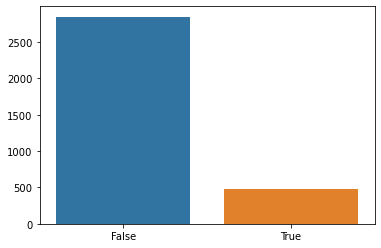

In [16]:
#churn histogram
c= df['churn'].value_counts()
sns.barplot(c.index, c.values)
plt.savefig('images/churn_rate.png', facecolor='white', transparent=False)

In [17]:
#churn rate
print('Churn Rate = ',(c[1]/(c[0]+c[1])*100), '%')

Churn Rate =  14.491449144914492 %


Let's see if we can get a sense of how each state is churning.

<AxesSubplot:xlabel='state'>

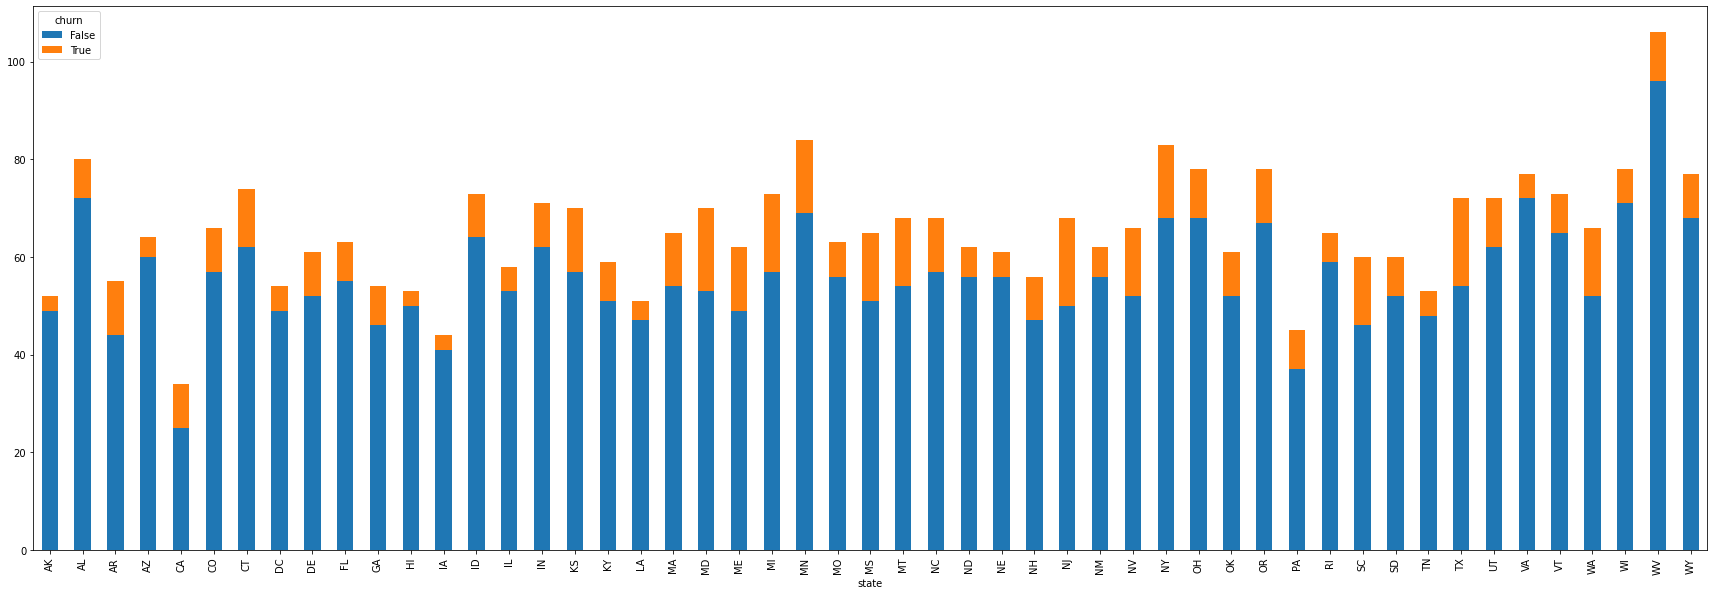

In [18]:
#churn by state
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

In [19]:
#unchurned customers by state
freq=df.groupby(['state']) ['churn'].value_counts().unstack()
freq[1].sort_values(ascending=False)

state
TX    18
NJ    18
MD    17
MI    16
NY    15
MN    15
MS    14
MT    14
WA    14
SC    14
NV    14
ME    13
KS    13
CT    12
NC    11
MA    11
OR    11
AR    11
OH    10
UT    10
WV    10
IN     9
ID     9
DE     9
CO     9
CA     9
WY     9
NH     9
OK     9
VT     8
SD     8
FL     8
KY     8
PA     8
GA     8
AL     8
MO     7
WI     7
ND     6
RI     6
NM     6
IL     5
DC     5
TN     5
VA     5
NE     5
LA     4
AZ     4
HI     3
IA     3
AK     3
Name: True, dtype: int64

In [20]:
#churn percentage by state
pct= freq.divide(freq.sum(axis=1),  axis=0)
pct[1].sort_values(ascending=False)

state
CA    0.264706
NJ    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
MT    0.205882
AR    0.200000
KS    0.185714
NY    0.180723
MN    0.178571
PA    0.177778
MA    0.169231
CT    0.162162
NC    0.161765
NH    0.160714
GA    0.148148
DE    0.147541
OK    0.147541
OR    0.141026
UT    0.138889
CO    0.136364
KY    0.135593
SD    0.133333
OH    0.128205
FL    0.126984
IN    0.126761
ID    0.123288
WY    0.116883
MO    0.111111
VT    0.109589
AL    0.100000
ND    0.096774
NM    0.096774
WV    0.094340
TN    0.094340
DC    0.092593
RI    0.092308
WI    0.089744
IL    0.086207
NE    0.081967
LA    0.078431
IA    0.068182
VA    0.064935
AZ    0.062500
AK    0.057692
HI    0.056604
Name: True, dtype: float64

CA has the smallest sample size and the largest churn percentage.  We are seeing fairly large churn rates by state.

Now we are going to numerically encode the 'state', 'international plan', and 'voice mail plan' columns for our analysis so that we may better quantify out data.

In [21]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()

In [22]:
#keeping track of States and associated numeric values
le= preprocessing.LabelEncoder()
le.fit(df['state'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'AK': 0, 'AL': 1, 'AR': 2, 'AZ': 3, 'CA': 4, 'CO': 5, 'CT': 6, 'DC': 7, 'DE': 8, 'FL': 9, 'GA': 10, 'HI': 11, 'IA': 12, 'ID': 13, 'IL': 14, 'IN': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'MA': 19, 'MD': 20, 'ME': 21, 'MI': 22, 'MN': 23, 'MO': 24, 'MS': 25, 'MT': 26, 'NC': 27, 'ND': 28, 'NE': 29, 'NH': 30, 'NJ': 31, 'NM': 32, 'NV': 33, 'NY': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40, 'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VA': 45, 'VT': 46, 'WA': 47, 'WI': 48, 'WV': 49, 'WY': 50}


In [23]:
#encoding data
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

#print (df['Voice mail plan'][:4])
print (df.dtypes)

state                       int32
account length              int64
area code                   int64
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [24]:
#checking for null values
df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [25]:
#visualizing dataframe stats
df.describe()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,14.824911,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,26.000000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,39.000000,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [26]:
#view mean and count data for churned and non churned customers
pd.set_option('display.max_columns', None)
aggs= df.groupby("churn").agg(['mean', 'count'])
aggs.head()

state       account length         area code        \
            mean count           mean count        mean count   
churn                                                           
False  26.011930  2850     100.793684  2850  437.074737  2850   
True   26.339545   483     102.664596   483  437.817805   483   

      international plan       voice mail plan       number vmail messages  \
                    mean count            mean count                  mean   
churn                                                                        
False           0.065263  2850        0.295439  2850              8.604561   
True            0.283644   483        0.165631   483              5.115942   

            total day minutes       total day calls       total day charge  \
      count              mean count            mean count             mean   
churn                                                                        
False  2850        175.175754  2850      100.283158  2850        29.780421   
True    483        206.914079   483      101.335404   483        35.175921   

            total eve minutes       total eve calls       total eve charge  \
      count              mean count            mean count             mean   
churn                                                                        
False  2850        199.043298  2850      100.038596  2850        16.918909   
True    483        212.410145   483      100.561077   483        18.054969   

            total night minutes       total night calls        \
      count                mean count              mean count   
churn                                                           
False  2850          200.133193  2850        100.058246  2850   
True    483          205.231677   483        100.399586   483   

      total night charge       total intl minutes       total intl calls  \
                    mean count               mean count             mean   
churn                                                                      
False           9.006074  2850          10.158877  2850         4.532982   
True            9.235528   483          10.700000   483         4.163561   

            total intl charge       customer service calls        
      count              mean count                   mean count  
churn                                                             
False  2850          2.743404  2850               1.449825  2850  
True    483          2.889545   483               2.229814   483

Just in looking at the means for each column some trends stand out.  Those that churned had significantly less voicemail messages, about 20% higher charges, and approxmimately 50% more customer service calls.  On the surface this makes sense, as less voicemails would suggest less need for the service, more expenses are dissuasive, and more customer service calls indicate a frustration with the service.  It is interesting however, that those that churned actually used more total day minutes than those that didn't.  Lets continue to investigate the data.

Lets take a look at trends for area code, voicemail plan, and international plan.

#### Area Code

<AxesSubplot:xlabel='area code'>

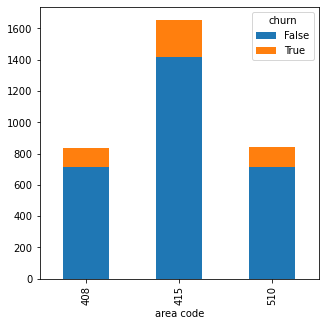

In [27]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [28]:
#churn totals for area code
freqdf=df.groupby(['area code']) ['churn'].value_counts().unstack()
freqdf

churn,False,True
area code,,
408,716,122
415,1419,236
510,715,125


In [29]:
#churn percentages
pctdf= freqdf.divide(freqdf.sum(axis=1), axis=0)
pctdf

churn,False,True
area code,,
408,0.854415,0.145585
415,0.857402,0.142598
510,0.851190,0.148810


Each area code has a very similar churn rate, there is unlikely to be any indication from this data.  Moreover, these area codes seems to be assigned randomsly and not relevant to the state the customer is in.  We can drop this column from the dataframe.

In [30]:
#dropping area code from dataframe
df=df.drop(['area code'], axis=1)
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,49,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,39,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,6,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#### International Plan

<AxesSubplot:xlabel='international plan'>

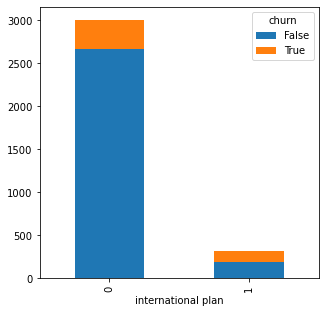

In [31]:
#international plan
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [32]:
#quantified churn for international plans
freqdf1=df.groupby(['international plan']) ['churn'].value_counts().unstack()
freqdf1

churn,False,True
international plan,,
0,2664,346
1,186,137


In [33]:
#international plan percentages
pctdf1= freqdf1.divide(freqdf1.sum(axis=1), axis=0)
pctdf1

churn,False,True
international plan,,
0,0.885050,0.114950
1,0.575851,0.424149


Those with an international plan saw a much greater churn rate than those without.  Over 42% of international plan holders leave.  This is something to note.

#### Voice Mail Plan

<AxesSubplot:xlabel='voice mail plan'>

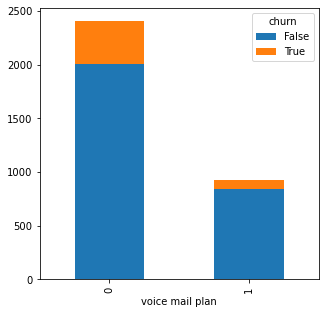

In [34]:
#voice mail hist
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

In [35]:
#quantified voice mail plan churn
freqdf2=df.groupby(['voice mail plan']) ['churn'].value_counts().unstack()
freqdf2

churn,False,True
voice mail plan,,
0,2008,403
1,842,80


In [36]:
#voice mail churn percentages
pctd2= freqdf2.divide(freqdf2.sum(axis=1), axis=0)
pctd2

churn,False,True
voice mail plan,,
0,0.832849,0.167151
1,0.913232,0.086768


The overwhelming majority of people do not have a voicemail plan but those that do have a much smaller churn rate.  A customer is twice as likely to churn if they don't have a voice mail plan.

#### Number of Voicemails

In [37]:
#checking values for number of voicemails
df['number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
35      32
22      32
39      30
37      29
34      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
41      13
16      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
8        2
48       2
50       2
9        2
11       2
49       1
10       1
4        1
51       1
Name: number vmail messages, dtype: int64

In [38]:
#number of voicemails by churn
nvmdf= df.groupby(['number vmail messages'])['churn'].value_counts().unstack()
nvmdf

churn,False,True
number vmail messages,,
0,2008.0,403.0
4,1.0,NaN
8,2.0,NaN
9,2.0,NaN
10,1.0,NaN
11,2.0,NaN
12,6.0,NaN
13,4.0,NaN
14,7.0,NaN


In [39]:
#change NaN values to 0
nvmdf[np.isnan(nvmdf)]= 0

In [40]:
#sorting values
nvmpct= nvmdf.divide(nvmdf.sum(axis=1), axis=0)
nvmpct[1].sort_values(ascending=False)

number vmail messages
48    0.500000
18    0.285714
44    0.285714
42    0.266667
41    0.230769
0     0.167151
45    0.166667
29    0.150943
26    0.146341
32    0.146341
33    0.130435
35    0.125000
36    0.117647
28    0.117647
15    0.111111
20    0.090909
31    0.083333
16    0.076923
21    0.071429
17    0.071429
37    0.068966
34    0.068966
27    0.068182
22    0.062500
40    0.062500
19    0.052632
30    0.045455
38    0.040000
24    0.023810
14    0.000000
4     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
49    0.000000
39    0.000000
46    0.000000
43    0.000000
23    0.000000
25    0.000000
47    0.000000
50    0.000000
51    0.000000
Name: True, dtype: float64

<AxesSubplot:xlabel='number vmail messages', ylabel='True'>

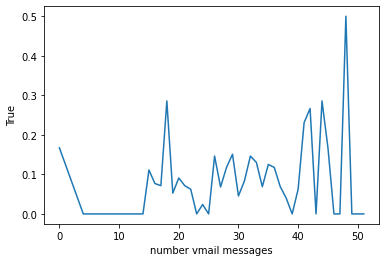

In [41]:
#lineplot of churn%
sns.lineplot(data=nvmpct[1])

In [42]:
#check correlation
df['number vmail messages'].corr(df['churn'])

-0.08972796983506427

It doesn't seem as if there is a meaningful connection between number of voicemail messages and churn.  We can drop this column from our logistic regression.

In [43]:
#drop number vmail messages
df=df.drop(['number vmail messages'], axis=1)
df

,state,account length,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,0,1,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,0,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,0,1,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,49,68,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,39,28,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,6,184,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


#### Customer Service Calls

Customer service calls were higher on average for customers who churned vs those who didn't.  This makes sense at one would only call customer service if there were issues with some aspect of their service.  Lets investigate.

In [44]:
df['customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64

In [45]:
#grouping customer service and churn
csc= df.groupby(['customer service calls'])['churn'].value_counts().unstack()
csc

churn,False,True
customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


In [46]:
#change NaN values to 0
csc[np.isnan(csc)]= 0
csc

churn,False,True
customer service calls,,
0,605.0,92.0
1,1059.0,122.0
2,672.0,87.0
3,385.0,44.0
4,90.0,76.0
5,26.0,40.0
6,8.0,14.0
7,4.0,5.0
8,1.0,1.0


In [47]:
#sorting values
cscpct= csc.divide(csc.sum(axis=1), axis=0)
cscpct[1].sort_values(ascending=False)

customer service calls
9    1.000000
6    0.636364
5    0.606061
7    0.555556
8    0.500000
4    0.457831
0    0.131994
2    0.114625
1    0.103302
3    0.102564
Name: True, dtype: float64

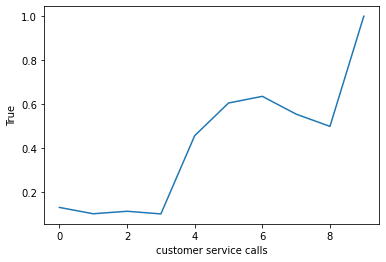

In [48]:
sns.lineplot(data= cscpct[1])
plt.savefig('images/cscalls.png', facecolor='white', transparent=False)

<AxesSubplot:>

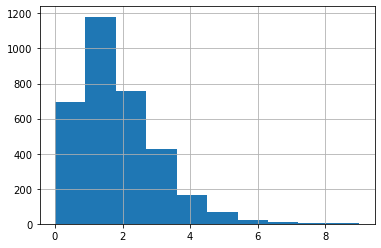

In [49]:
#customer service calls histogram
df['customer service calls'].hist()

There is a correlation between amount of calls and churn percentage.  Most people don't call more than 3 times and churn rates jump significantly.  This is a critical column for prediction.

#### Call Minutes and Charge

The amount of calls made during the day, evening, and night had almost identical means for customers who churned and didn't churn.  This suggests this column probably isn't meaningful.  Moreover, number of calls doesn't determine utility for a customer nor does it typically affect how much a customer is charged, but minutes do.  So we will drop all number of call categories and take a close look at how minutes affect churn, starting with checking rates for morning, evening and night.

In [50]:
#dropping number of calls made
df= df.drop(['total day calls', 'total eve calls', 'total night calls'], axis=1)

In [51]:
# rate/min by timing of day
Day_Rt = (df['total day charge'] / df['total day minutes']).median()
Eve_Rt = (df['total eve charge'] / df['total eve minutes']).median()
Night_Rt = (df['total night charge'] / df['total night minutes']).median()
Intl_Rt = (df['total intl charge'] / df['total intl minutes']).median()
print("Day Rate:", Day_Rt)
print("Eve Rate:", Eve_Rt)
print("Night Rate:", Night_Rt)
print("International Rate:", Intl_Rt)

Day Rate: 0.17000415454923143
Eve Rate: 0.085
Night Rate: 0.045
International Rate: 0.27


There is a significantly different charge per minute for each segment which means we should investigate this data further.  Moreover, charge is dependent on minutes so we can drop the charge values as minutes are the independent variable potentially relating to churn.

In [52]:
mindf= df.copy()
mindf

,state,account length,international plan,voice mail plan,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,0,1,265.1,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1,False
1,35,107,0,1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1,False
2,31,137,0,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0,False
3,35,84,1,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2,False
4,36,75,1,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,0,1,156.2,26.55,215.5,18.32,279.1,12.56,9.9,6,2.67,2,False
3329,49,68,0,0,231.1,39.29,153.4,13.04,191.3,8.61,9.6,4,2.59,3,False
3330,39,28,0,0,180.8,30.74,288.8,24.55,191.9,8.64,14.1,6,3.81,2,False
3331,6,184,1,0,213.8,36.35,159.6,13.57,139.2,6.26,5.0,10,1.35,2,False


In [53]:
#check mintues info to bin data
mindf.describe()

,state,account length,international plan,voice mail plan,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,0.096910,0.276628,179.775098,30.562307,200.980348,17.083540,200.872037,9.039325,10.237294,4.479448,2.764581,1.562856
std,14.824911,39.822106,0.295879,0.447398,54.467389,9.259435,50.713844,4.310668,50.573847,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,0.000000,0.000000,143.700000,24.430000,166.600000,14.160000,167.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,26.000000,101.000000,0.000000,0.000000,179.400000,30.500000,201.400000,17.120000,201.200000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,39.000000,127.000000,0.000000,1.000000,216.400000,36.790000,235.300000,20.000000,235.300000,10.590000,12.100000,6.000000,3.270000,2.000000
max,50.000000,243.000000,1.000000,1.000000,350.800000,59.640000,363.700000,30.910000,395.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [54]:
#binning data
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]
labels = ['0-50','50-100','100-150','150-200','200-250','250-300', '300-350', '350-400']
mindf['daymins bracket'] = pd.cut(mindf['total day minutes'], bins=bins, labels=labels)
mindf['evemins bracket'] = pd.cut(mindf['total eve minutes'], bins=bins, labels=labels)
mindf['nmins bracket'] = pd.cut(mindf['total night minutes'], bins=bins, labels=labels)
mindf

,state,account length,international plan,voice mail plan,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,daymins bracket,evemins bracket,nmins bracket
0,16,128,0,1,265.1,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1,False,250-300,150-200,200-250
1,35,107,0,1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1,False,150-200,150-200,250-300
2,31,137,0,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0,False,200-250,100-150,150-200
3,35,84,1,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2,False,250-300,50-100,150-200
4,36,75,1,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3,False,150-200,100-150,150-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,0,1,156.2,26.55,215.5,18.32,279.1,12.56,9.9,6,2.67,2,False,150-200,200-250,250-300
3329,49,68,0,0,231.1,39.29,153.4,13.04,191.3,8.61,9.6,4,2.59,3,False,200-250,150-200,150-200
3330,39,28,0,0,180.8,30.74,288.8,24.55,191.9,8.64,14.1,6,3.81,2,False,150-200,250-300,150-200
3331,6,184,1,0,213.8,36.35,159.6,13.57,139.2,6.26,5.0,10,1.35,2,False,200-250,150-200,100-150


In [55]:
#churn rate by day minutes used brackets
grouped_daybrack = mindf.groupby(['daymins bracket', 'churn']).size().unstack().reset_index()

sum_all_tday = grouped_daybrack[1]+grouped_daybrack[0]
grouped_daybrack['churn_percentage'] = (grouped_daybrack[True] / sum_all_tday) * 100
grouped_daybrack

churn,daymins bracket,False,True,churn_percentage
0,0-50,25,3,10.714286
1,50-100,185,24,11.483254
2,100-150,652,88,11.891892
3,150-200,1063,105,8.989726
4,200-250,750,108,12.587413
5,250-300,163,122,42.807018
6,300-350,11,31,73.809524
7,350-400,0,1,100.000000


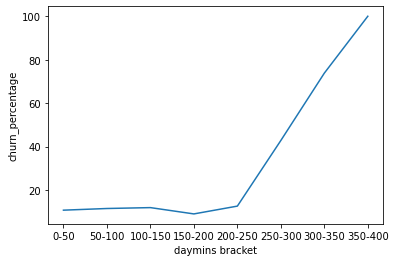

In [56]:
#lineplot of churn %
sns.lineplot(data=grouped_daybrack, y='churn_percentage', x= 'daymins bracket');
plt.savefig('images/daytime_mins.png', facecolor='white', transparent=False)

In [57]:
#churn rate by day minutes used brackets
grouped_evebrack = mindf.groupby(['evemins bracket', 'churn']).size().unstack().reset_index()
sum_all_teve = grouped_evebrack[1]+grouped_evebrack[0]
grouped_evebrack['churn_percentage'] = (grouped_evebrack[True] / sum_all_teve) * 100
grouped_evebrack

churn,evemins bracket,False,True,churn_percentage
0,0-50,6,0,0.000000
1,50-100,64,6,8.571429
2,100-150,388,46,10.599078
3,150-200,978,141,12.600536
4,200-250,971,171,14.973730
5,250-300,381,94,19.789474
6,300-350,58,22,27.500000
7,350-400,3,3,50.000000


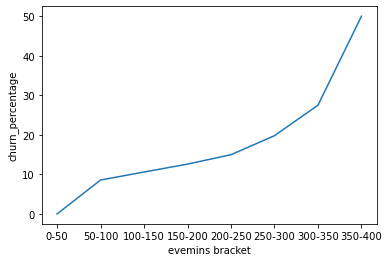

In [58]:
#lineplot of churn %
sns.lineplot(data=grouped_evebrack, y='churn_percentage', x= 'evemins bracket');

In [59]:
#churn rate by day minutes used brackets
grouped_nbrack = mindf.groupby(['nmins bracket', 'churn']).size().unstack().reset_index()

sum_all_tn = grouped_nbrack[1]+grouped_nbrack[0]
grouped_nbrack['churn_percentage'] = (grouped_nbrack[True] / sum_all_tn) * 100
grouped_nbrack

churn,nmins bracket,False,True,churn_percentage
0,0-50,3,1,25.000000
1,50-100,66,4,5.714286
2,100-150,395,51,11.434978
3,150-200,960,166,14.742451
4,200-250,963,167,14.778761
5,250-300,394,86,17.916667
6,300-350,60,7,10.447761
7,350-400,9,1,10.000000


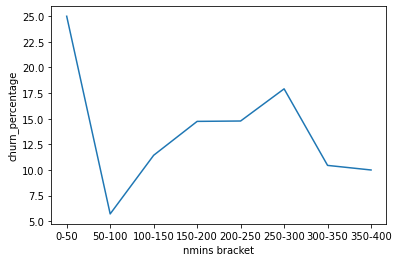

In [60]:
#lineplot of churn %
sns.lineplot(data=grouped_nbrack, y='churn_percentage', x= 'nmins bracket');

We are seeing a clear pattern here.  Putting aside night minutes, which are significantly cheaper than day and eve minutes, there is a higher churn rate the more the talking minutes increase.  Strong users of the service (big talkers) that rack up large amounts of minutes are the most likely to churn.  This suggest that the SyriaTel pricing model is not conducive to frequent users.

#### Total Charge

In [61]:
#new df
charge= df.copy()
charge['totalcharge']= charge['total day charge']+charge['total eve charge']+ charge['total night charge']+ charge['total intl charge']
charge

,state,account length,international plan,voice mail plan,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,totalcharge
0,16,128,0,1,265.1,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1,False,75.56
1,35,107,0,1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1,False,59.24
2,31,137,0,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0,False,62.29
3,35,84,1,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2,False,66.80
4,36,75,1,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3,False,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,0,1,156.2,26.55,215.5,18.32,279.1,12.56,9.9,6,2.67,2,False,60.10
3329,49,68,0,0,231.1,39.29,153.4,13.04,191.3,8.61,9.6,4,2.59,3,False,63.53
3330,39,28,0,0,180.8,30.74,288.8,24.55,191.9,8.64,14.1,6,3.81,2,False,67.74
3331,6,184,1,0,213.8,36.35,159.6,13.57,139.2,6.26,5.0,10,1.35,2,False,57.53


In [62]:
#establishing bin size
charge['totalcharge'].describe()

count    3333.000000
mean       59.449754
std        10.502261
min        22.930000
25%        52.380000
50%        59.470000
75%        66.480000
max        96.150000
Name: totalcharge, dtype: float64

In [63]:
#binning data
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80', '80-90', '90-100']
charge['totalchargebracket'] = pd.cut(charge['totalcharge'], bins=bins, labels=labels)
charge

,state,account length,international plan,voice mail plan,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,totalcharge,totalchargebracket
0,16,128,0,1,265.1,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1,False,75.56,70-80
1,35,107,0,1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1,False,59.24,50-60
2,31,137,0,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0,False,62.29,60-70
3,35,84,1,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2,False,66.80,60-70
4,36,75,1,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3,False,52.09,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,0,1,156.2,26.55,215.5,18.32,279.1,12.56,9.9,6,2.67,2,False,60.10,60-70
3329,49,68,0,0,231.1,39.29,153.4,13.04,191.3,8.61,9.6,4,2.59,3,False,63.53,60-70
3330,39,28,0,0,180.8,30.74,288.8,24.55,191.9,8.64,14.1,6,3.81,2,False,67.74,60-70
3331,6,184,1,0,213.8,36.35,159.6,13.57,139.2,6.26,5.0,10,1.35,2,False,57.53,50-60


In [64]:
#total charge brackets
grouped_chargebrack = charge.groupby(['totalchargebracket', 'churn']).size().unstack().reset_index()

sum_all_charge = grouped_chargebrack[1]+grouped_chargebrack[0]
grouped_chargebrack['churn_percentage'] = (grouped_chargebrack[True] / sum_all_charge) * 100
grouped_chargebrack

churn,totalchargebracket,False,True,churn_percentage
0,20-30,7,2,22.222222
1,30-40,92,12,11.538462
2,40-50,430,58,11.885246
3,50-60,999,125,11.120996
4,60-70,1021,61,5.637708
5,70-80,283,162,36.404494
6,80-90,18,58,76.315789
7,90-100,0,5,100.000000


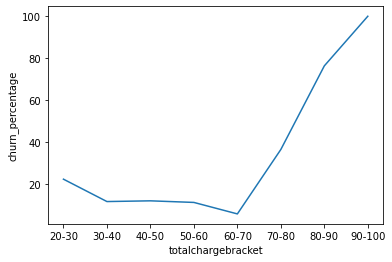

In [104]:
#lineplot of churn %
sns.lineplot(data=grouped_chargebrack, y='churn_percentage', x= 'totalchargebracket');
plt.savefig('images/total_charge.png', facecolor='white', transparent=False)

The total charge seems to be a clear indicator of churn.  Total charges of $30-60 as have very similar churn rates in between 11-12pct.  The churn rate even dips to 5.6pct from a charge of $60-70, however, after that point churn rates surge.

In [66]:
# calculate rates of making one international call, with and without international plan
Intl_Plan = df[df['international plan'] == 1]
No_Intl_Plan = df[df['international plan'] == 0]
Intl_Plan_Rate = (Intl_Plan['total intl charge'] / Intl_Plan['total intl minutes']).median()
Non_Intl_Plan_Rate = (No_Intl_Plan['total intl charge'] / No_Intl_Plan['total intl minutes']).median()
print("Int'l Plan Rate:", Intl_Plan_Rate)
print("No Int'l Plan Rate: ", Non_Intl_Plan_Rate)

Int'l Plan Rate: 0.27
No Int'l Plan Rate:  0.27


With and without an international plan, customers are charged .27 per minute.  Its unclear what the benefits of the international plan are but they likely aren't good enough due to the high churn rate.

####  Account Length


<AxesSubplot:>

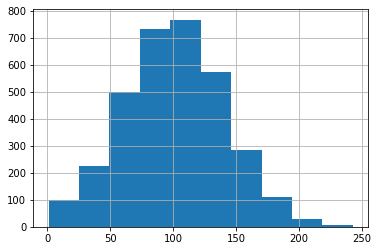

In [67]:
#histogram of account length
df['account length'].hist()

Although mean account length was similar for churning and non churning customers, lets bin the data and see if there are any churn spikes.

In [68]:
#setting account lengh df equal to our dataframe
dfal=df.copy()

In [69]:
#binning data
bins = [0, 25, 50,75, 100, 125, 150, 175, 200, 225, 250]
labels = ['0-25','25-50','50-75','75-100','100-125','125-150', '150-175', '175-200', '200-225','225-250']
dfal['account bracket'] = pd.cut(dfal['account length'], bins=bins, labels=labels)

dfal

,state,account length,international plan,voice mail plan,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,account bracket
0,16,128,0,1,265.1,45.07,197.4,16.78,244.7,11.01,10.0,3,2.70,1,False,125-150
1,35,107,0,1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3,3.70,1,False,100-125
2,31,137,0,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,5,3.29,0,False,125-150
3,35,84,1,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,7,1.78,2,False,75-100
4,36,75,1,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,3,2.73,3,False,50-75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,0,1,156.2,26.55,215.5,18.32,279.1,12.56,9.9,6,2.67,2,False,175-200
3329,49,68,0,0,231.1,39.29,153.4,13.04,191.3,8.61,9.6,4,2.59,3,False,50-75
3330,39,28,0,0,180.8,30.74,288.8,24.55,191.9,8.64,14.1,6,3.81,2,False,25-50
3331,6,184,1,0,213.8,36.35,159.6,13.57,139.2,6.26,5.0,10,1.35,2,False,175-200


In [70]:
grouped_brack = dfal.groupby(['account bracket', 'churn']).size().unstack().reset_index()

sum_all_t = grouped_brack[1]+grouped_brack[0]
grouped_brack['churn_percentage'] = (grouped_brack[True] / sum_all_t) * 100
grouped_brack

churn,account bracket,False,True,churn_percentage
0,0-25,84,15,15.151515
1,25-50,213,29,11.983471
2,50-75,474,74,13.503650
3,75-100,659,116,14.967742
4,100-125,666,121,15.374841
5,125-150,452,74,14.068441
6,150-175,203,36,15.062762
7,175-200,79,12,13.186813
8,200-225,18,6,25.000000
9,225-250,2,0,0.000000


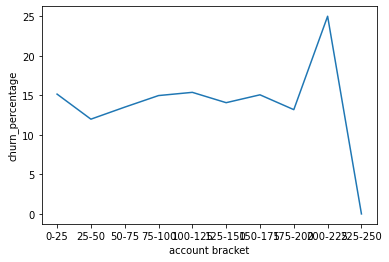

In [71]:
#lineplot of churn %
sns.lineplot(data=grouped_brack, y='churn_percentage', x= 'account bracket');

There is is pretty consistant churn rate amongst all account length brackets therefore this is not an important columns and can be dropped.  The spike and dip at the end is attributed to small samples size.

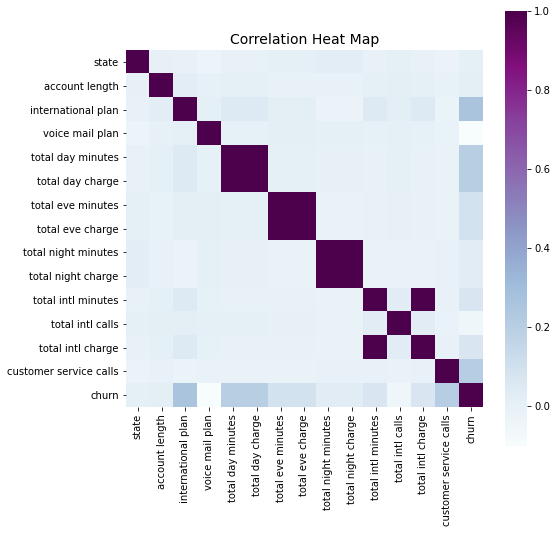

In [72]:
#make a correlation map
churncorr = df.corr()
plt.subplots(figsize=(8, 8))

sns.heatmap(churncorr, square=True, cmap="BuPu")
plt.title("Correlation Heat Map", fontsize=14)
plt.show()

After analyzing the each column we can also drop all the number of calls columns, and total minutes columns as these and secondary to the charge.  We will keep each charge column as opposed to total charge because to highlight there is greater sensitivity to higher rates ie day charge vs night charge.

In [73]:
df= df.drop(['account length', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'total intl calls'], axis =1)
df

,state,international plan,voice mail plan,total day charge,total eve charge,total night charge,total intl charge,customer service calls,churn
0,16,0,1,45.07,16.78,11.01,2.70,1,False
1,35,0,1,27.47,16.62,11.45,3.70,1,False
2,31,0,0,41.38,10.30,7.32,3.29,0,False
3,35,1,0,50.90,5.26,8.86,1.78,2,False
4,36,1,0,28.34,12.61,8.41,2.73,3,False
...,...,...,...,...,...,...,...,...,...
3328,3,0,1,26.55,18.32,12.56,2.67,2,False
3329,49,0,0,39.29,13.04,8.61,2.59,3,False
3330,39,0,0,30.74,24.55,8.64,3.81,2,False
3331,6,1,0,36.35,13.57,6.26,1.35,2,False


In [74]:
#drop states
df= df.drop(['state'], axis=1)

### 1. Decision Trees

In [75]:
#split the variables
y= df['churn']
X= df.drop(['churn'], axis=1)

In [76]:
# splitting test and training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, random_state=42)

scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

dtree= DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)

model_predictions(dtree, X_train_scaled, X_test_scaled, y_train, y_test)

Training Precision:  1.0
Testing Precision:  0.6732673267326733
-----
Training Recall:  1.0
Testing Recall:  0.6732673267326733
-----
Training Accuracy:  1.0
Testing Accuracy:  0.9010494752623688
-----
Training F1-Score:  1.0
Testing F1-Score:  0.6732673267326733


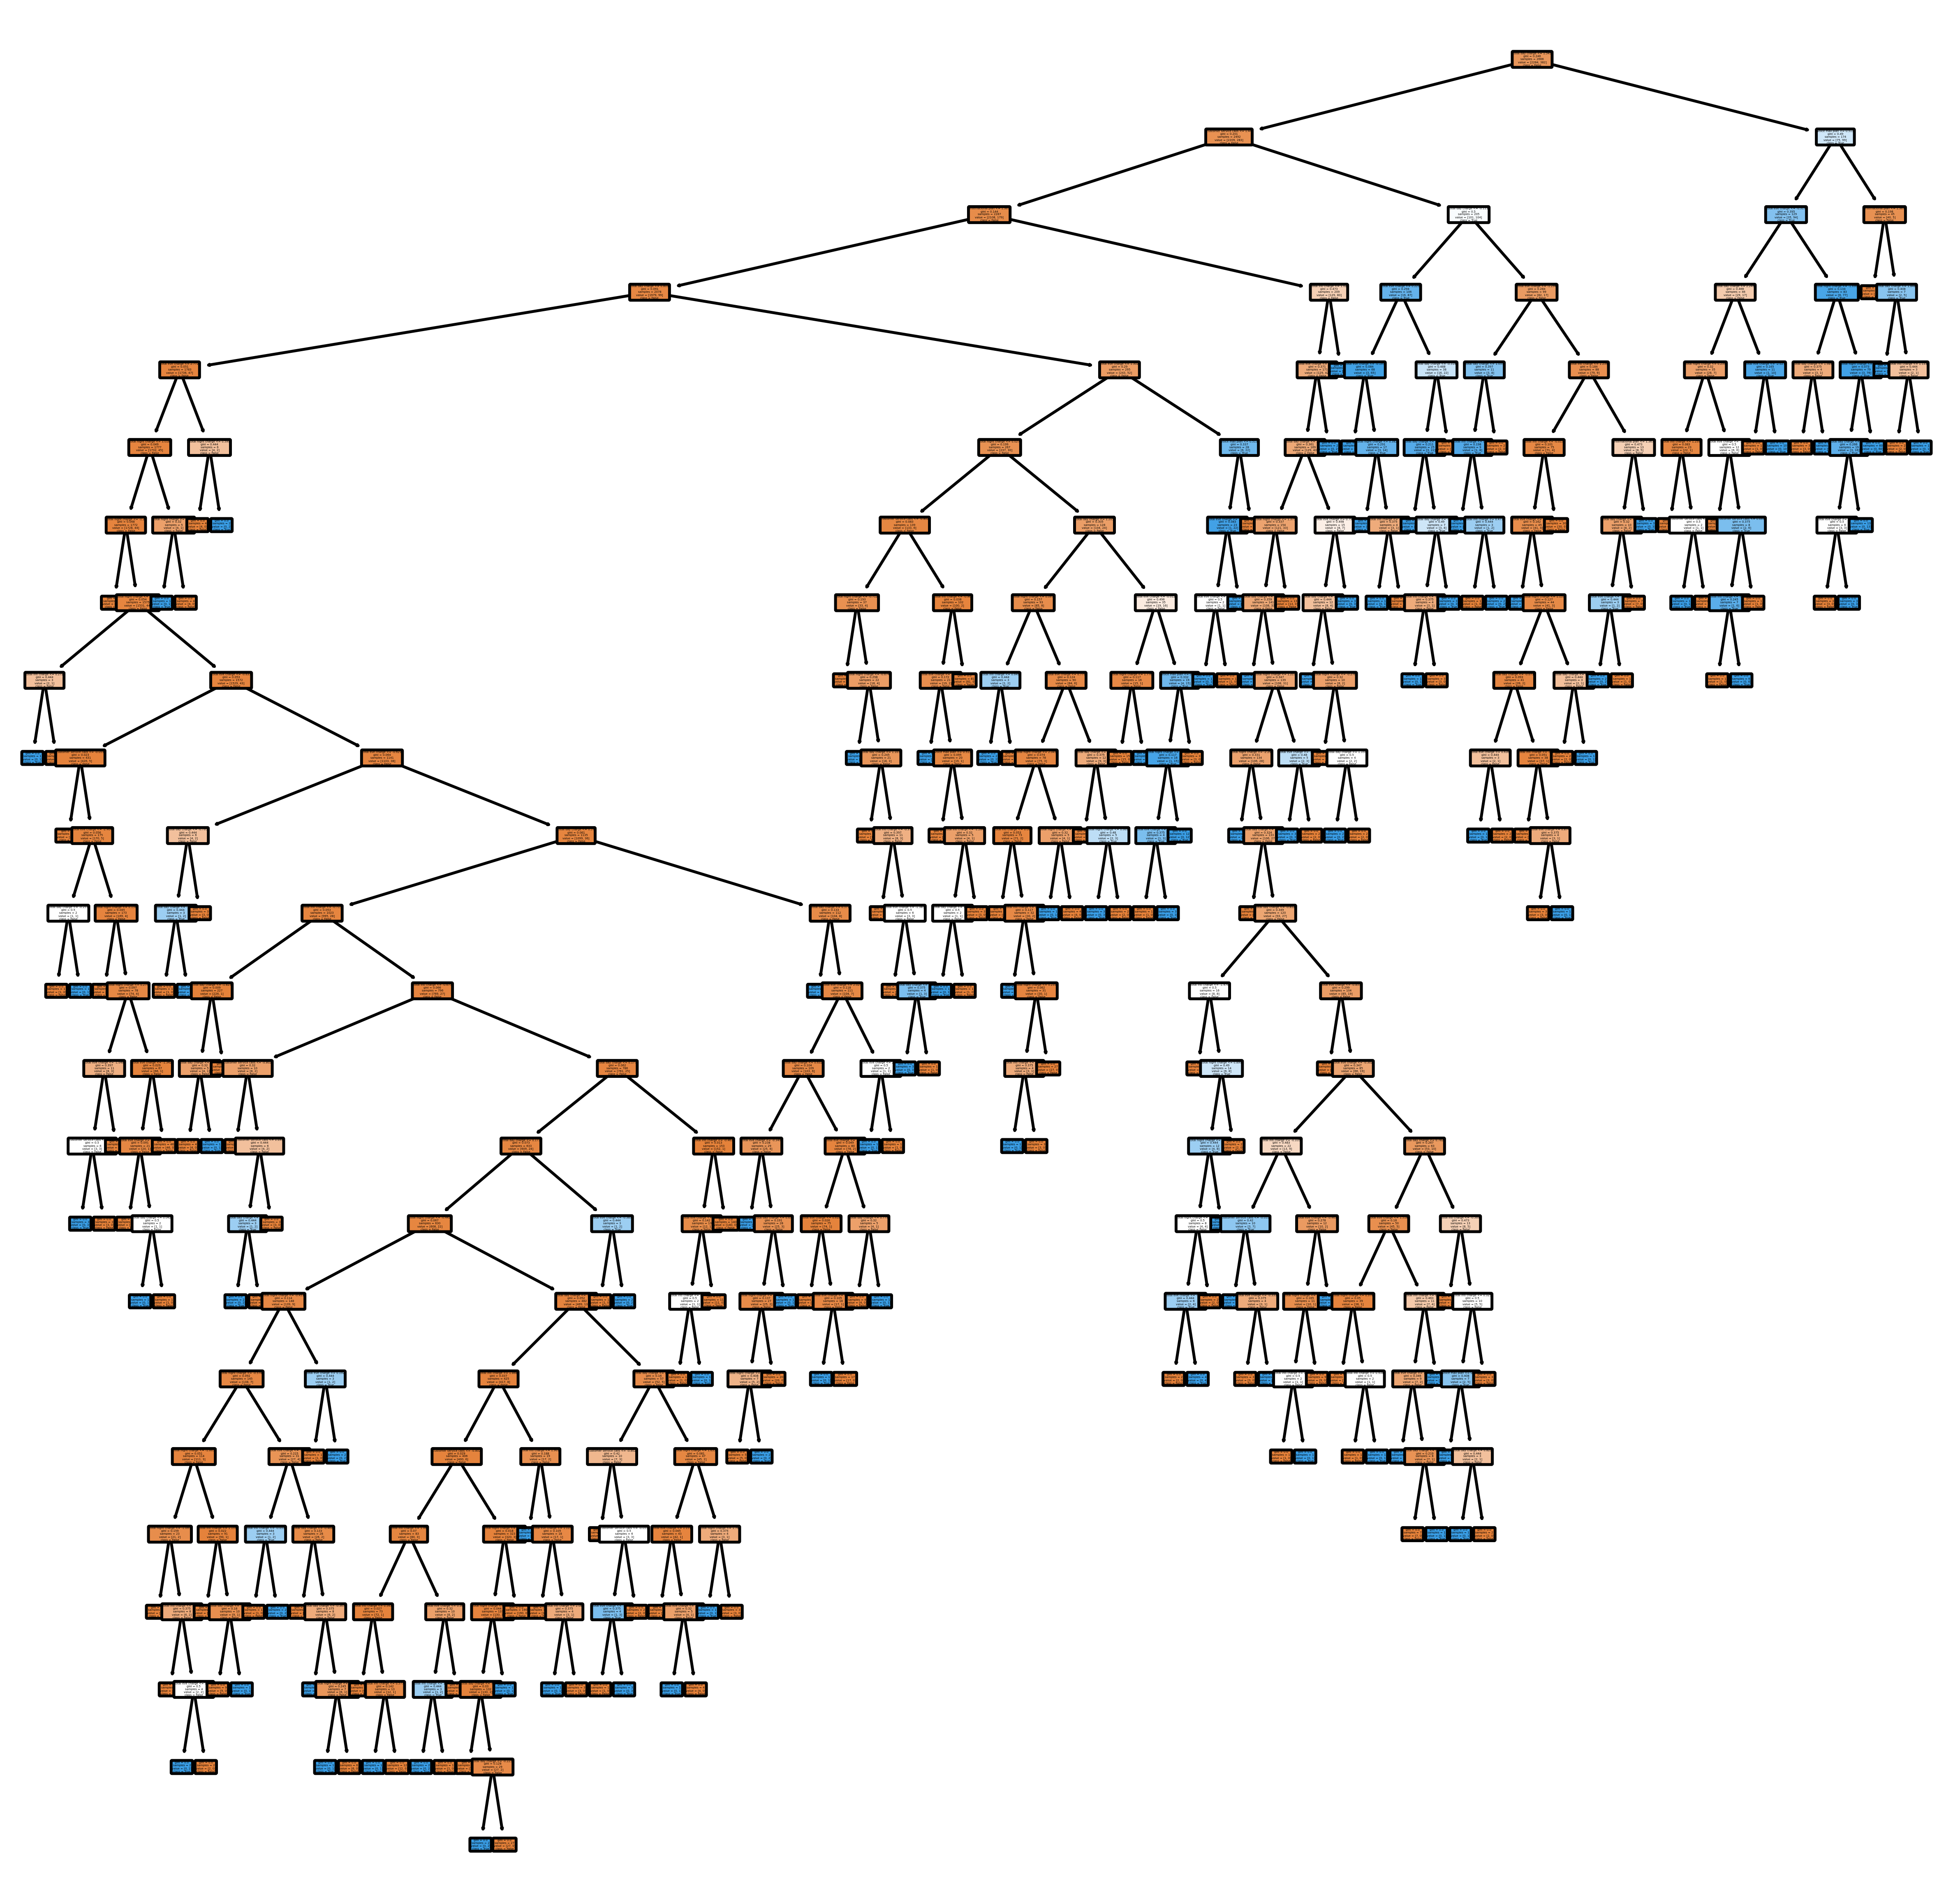

In [77]:
plt.figure(figsize=(12,12), dpi=500, edgecolor='black')

tree.plot_tree(dtree, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

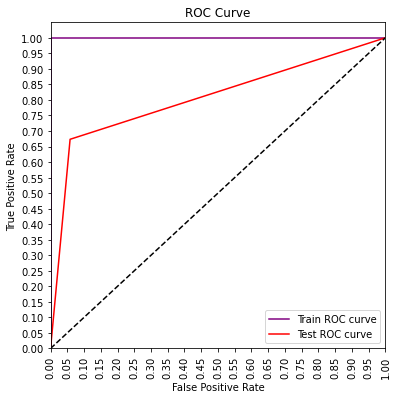

Train AUC: 1.0
Test AUC: 0.8074817199034392


In [78]:
#ROC curve
plot_roc_proba(dtree, X_train_scaled, X_test_scaled, y_train, y_test)

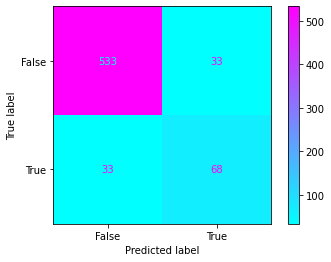

In [79]:
#confusion matrix
confusion_matrix(dtree, X_test_scaled, y_test)

### Model 2: Decision Tree with Hypertuning

In the above decision tree model, the recall, precision, and F1 scores were suboptimal.  Lets see if we can improve some scores with hyperparameter tuning.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= 420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
smote1 = SMOTE(sampling_strategy='minority', random_state=420)
# Fit and apply the transform
X_train_over, y_train_over = smote1.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over))

dtree1 = DecisionTreeClassifier(random_state=420)                       

dtree1.fit(X_train_over, y_train_over)

Counter({False: 2274, True: 2274})


DecisionTreeClassifier(random_state=420)

In [81]:
#checking predictions with smote 
model_predictions(dtree1, X_train_over, X_test_scaled, y_train_over, y_test)

Training Precision:  1.0
Testing Precision:  0.594059405940594
-----
Training Recall:  1.0
Testing Recall:  0.6593406593406593
-----
Training Accuracy:  1.0
Testing Accuracy:  0.8920539730134932
-----
Training F1-Score:  1.0
Testing F1-Score:  0.625


Using smote to deal with class imbalances hurt our scores across the board.  Lets try oversampling.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initiate sampling class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=420)
# Fit and apply the transform
X_train_over1, y_train_over1 = oversample.fit_resample(X_train_scaled, y_train)
# Summarize class distribution
print(Counter(y_train_over))

dtree2 = DecisionTreeClassifier(random_state=420)                       

dtree2.fit(X_train_over, y_train_over)

Counter({False: 2274, True: 2274})


DecisionTreeClassifier(random_state=420)

In [83]:
model_predictions(dtree2, X_train_over1, X_test_scaled, y_train_over1, y_test)

Training Precision:  1.0
Testing Precision:  0.6705882352941176
-----
Training Recall:  1.0
Testing Recall:  0.6263736263736264
-----
Training Accuracy:  1.0
Testing Accuracy:  0.9070464767616192
-----
Training F1-Score:  1.0
Testing F1-Score:  0.6477272727272727


Oversampling improves precision moderately and F1-score and accuracy slightly while slightly diminishing recall.  Slightly better than smote but worse than the initial scores.  Now lets scrap both and use Gridsearch to expedite our parameter tuning.

##### Gridsearch

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtree_gs = DecisionTreeClassifier(random_state=420)

dtree_grid = {
           'class_weight': ['None', 'balanced'],
           'criterion': ['gini', 'entropy'],
           'max_depth': [7, 8, 9, 10, 11, 12, 15],
           'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
           'min_samples_split': [1, 2, 3, 5, 10],
           'random_state': [420]
          }

gs_tree = GridSearchCV(estimator = dtree_gs, 
                             param_grid = dtree_grid, 
                             cv=5, 
                             return_train_score=True)

gs_tree.fit(X_train_scaled, y_train)

print('Best parameters for Our Decision Tree Model:')
gs_tree.best_params_

Best parameters for Our Decision Tree Model:


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 420}

We now have our optimal parameters from Gridsearch.  Lets apply them together our final tuned model.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=420)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


final_dtree = DecisionTreeClassifier(class_weight = 'balanced',
 criterion = 'entropy',
 max_depth = 11,
 min_samples_leaf =1,
 min_samples_split = 2, random_state=420)                       

final_dtree.fit(X_train_scaled, y_train)

model_predictions(final_dtree, X_train_scaled, X_test_scaled, y_train, y_test)

Training Precision:  0.8684863523573201
Testing Precision:  0.6746987951807228
-----
Training Recall:  0.8928571428571429
Testing Recall:  0.6153846153846154
-----
Training Accuracy:  0.9643660915228808
Testing Accuracy:  0.9070464767616192
-----
Training F1-Score:  0.8805031446540882
Testing F1-Score:  0.6436781609195402


Accuracy and Precision improved slightly.

### Model 3: K-Nearest Neighbor

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 420)
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()

In [87]:
#check knn predictions
model_predictions(knn, x_train_scaled, x_test_scaled, y_train, y_test)

Training Precision:  0.9056603773584906
Testing Precision:  0.7692307692307693
-----
Training Recall:  0.6122448979591837
Testing Recall:  0.43956043956043955
-----
Training Accuracy:  0.9336084021005251
Testing Accuracy:  0.9055472263868066
-----
Training F1-Score:  0.730593607305936
Testing F1-Score:  0.5594405594405594


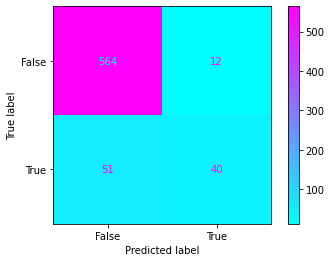

In [88]:
confusion_matrix(knn, x_test_scaled, y_test)

In [89]:
#defining best k
def find_best_k(x_train_scaled, y_train, x_test_scaled, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train_scaled, y_train)
        train_score = knn.score(x_train_scaled, y_train)
        test_score = knn.score(x_test_scaled, y_test)
        if test_score > best_score:
            best_k = k
            best_score = test_score
    
    print("Best Value for k: {}".format(best_k))
    
find_best_k(x_train_scaled, y_train, x_test_scaled, y_test)

Best Value for k: 9


In [90]:
#defining kn classifier
knn_9 = KNeighborsClassifier(n_neighbors=9)

In [91]:
#viewing model scores
model_predictions(knn_9, x_train_scaled, x_test_scaled, y_train, y_test)

Training Precision:  0.9137931034482759
Testing Precision:  0.8297872340425532
-----
Training Recall:  0.5408163265306123
Testing Recall:  0.42857142857142855
-----
Training Accuracy:  0.9249812453113279
Testing Accuracy:  0.9100449775112444
-----
Training F1-Score:  0.6794871794871796
Testing F1-Score:  0.5652173913043478


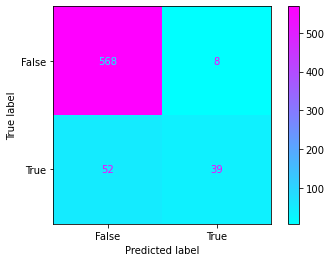

In [92]:
#confusion matrix
confusion_matrix(knn_9, x_test_scaled, y_test)

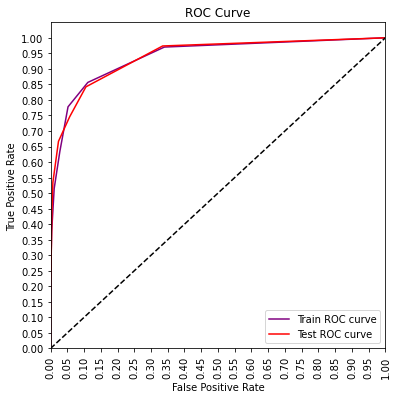

Train AUC: 0.938651602478466
Test AUC: 0.9393823099415206


In [114]:
#ROC curve
plot_roc_proba(knn_9, X_train_scaled, X_test_scaled, y_train, y_test)

### Model 4: Random Forest Classifier

In [94]:
X = df.drop(['churn'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=25)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced')

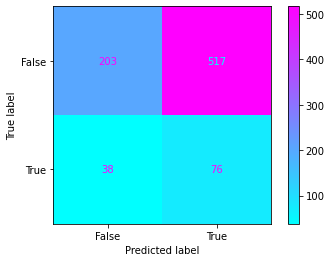

In [96]:
#confusion matrix
confusion_matrix(rfc, X_test, y_test)

In [97]:
#viewing model scores
model_predictions(rfc, X_train_scaled, X_test_scaled, y_train, y_test)

Training Precision:  1.0
Testing Precision:  0.9473684210526315
-----
Training Recall:  1.0
Testing Recall:  0.631578947368421
-----
Training Accuracy:  1.0
Testing Accuracy:  0.9448441247002398
-----
Training F1-Score:  1.0
Testing F1-Score:  0.7578947368421052


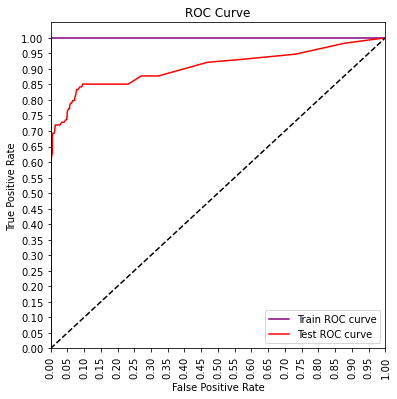

Train AUC: 1.0
Test AUC: 0.9062804580896686


<Figure size 432x288 with 0 Axes>

In [124]:
plot_roc_proba(rfc, X_train, X_test, y_train, y_test)
plt.savefig('images/roc_curve.png', facecolor='white', transparent=False)

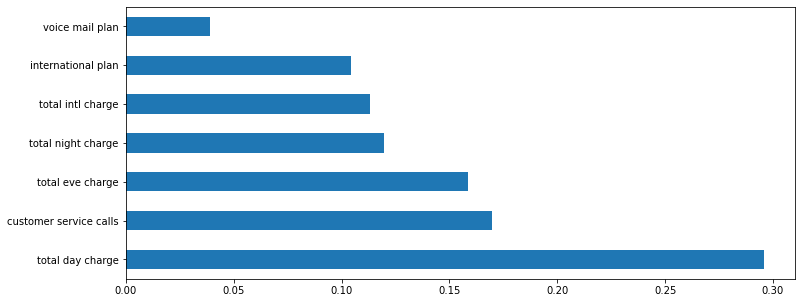

<Figure size 432x288 with 0 Axes>

In [125]:
# Feature importance
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances.nlargest(28).plot(kind='barh', figsize=(12,5))
plt.show()
plt.savefig('images/feature', facecolor= "white", transparent=False)

### Evaluation

The random forrest classifier was the most effective prediction model as the F1 score, Testing Precision, and Testing Accuracy were significantly higher than other models.  There was a slight dip in recall but overall model performance was stronger.  Given that there was a high class imbalance and only 14.49% of customers churned, recall is more important that precision because identifying the highest percentage of those that churned will allow Syriatel to optimize the efficiency of their promotional offers but given the minor difference with other models, this model was still the correct choice.

### Conclusion

The most impactful feature in the dataframe in determining a customers churn is the total day charge.  The day rate is the highest so naturally customers are more sensitive to a larger number in that column.  Customer service calls are the second most important feature and once a customer makes more than 3 calls, churn rate sky rockets.

Syriatel could best reduce churn by offering an unlimited minutes plan that would cater to customers who are frequent users because it would cap their spending which greatly reduces the risk of churn.  They can also offer special promotions to customers who are having trouble with the service to the point of calling more than 3 times.  A better pricing plan and customer care will significantly reduce churn and boost profits.